#### C→T base-editing reporter plasmid (pLV-SI-112) construction

In [1]:
%matplotlib inline

In [2]:
import sys 
sys.path.append("../../")
from QUEEN.queen import *
set_namespace(globals()) 
from QUEEN import cutsite as cs 

In [3]:
QUEEN(record="https://benchling.com/s/seq-0r6kj1kOMYhArIFPTIg5", dbtype="benchling", product="pLVSIN_CMV_pur")
QUEEN(record="36083", dbtype="addgene", product="pLV_eGFP")

<queen.QUEEN object; project='pLV_eGFP', length='7435 bp', topology='circular'>

In [4]:
pn = "PCR" 
pd = "Amplify the EGFP gene cassette from pLV-eGFP (Addgene 36083) using primer sets BC2-FW/SI680"
QUEEN(seq="GGTGAATTCCCGAGCGTGTCAGGGTGACCGTGGTGAGCAAGGGCGAGGA", product="BC2_FW")
QUEEN(seq="AATTGGATCCTTACTTGTACAGCTCGTCCA",product="SI680")
pLV_eGFP.searchsequence(query=BC2_FW.seq[-18:], product="FW", pn=pn, pd=pd)
pLV_eGFP.searchsequence(query=SI680.seq[-18:], product="RV", pn=pn, pd=pd)
cropdna(pLV_eGFP, FW[0].end, RV[0].start, product="extract1", pn=pn, pd=pd)
modifyends(extract1, BC2_FW.seq, SI680.rcseq, product="PCR_product", pn=pn, pd=pd)

<queen.QUEEN object; project='PCR_product', length='759 bp', topology='linear'>

In [5]:
pn = "Restriction enzyme digestion" 
pd = "Digest the EGFP gene cassette by EcoRI and BamHI"
PCR_product.searchsequence(cs.lib["EcoRI"], product="EcoRI", pn=pn, pd=pd)
PCR_product.searchsequence(cs.lib["BamHI"], product="BamHI", pn=pn, pd=pd)
cropdna(PCR_product, EcoRI[0], BamHI[0], product="fragment1", pn=pn, pd=pd)

<queen.QUEEN object; project='fragment1', length='750 bp', topology='linear'>

In [6]:
pn = "Restriction enzyme digestion" 
pd = "Digest pLVSIN_CMV_pur by EcoRI and BamHI"
pLVSIN_CMV_pur.searchsequence(cs.lib["EcoRI"], product="EcoRI", pn=pn, pd=pd)
pLVSIN_CMV_pur.searchsequence(cs.lib["BamHI"], product="BamHI", pn=pn, pd=pd)
cropdna(pLVSIN_CMV_pur, BamHI[0], EcoRI[0], product="fragment2", pn=pn, pd=pd)

<queen.QUEEN object; project='fragment2', length='7586 bp', topology='linear'>

In [7]:
pn = "Ligation"
pd = "Ligate fragment1 and fragment2"
joindna(fragment1,fragment2, product="pLV_SI_112", pn=pn, pd=pd)

<queen.QUEEN object; project='pLV_SI_112', length='8332 bp', topology='linear'>

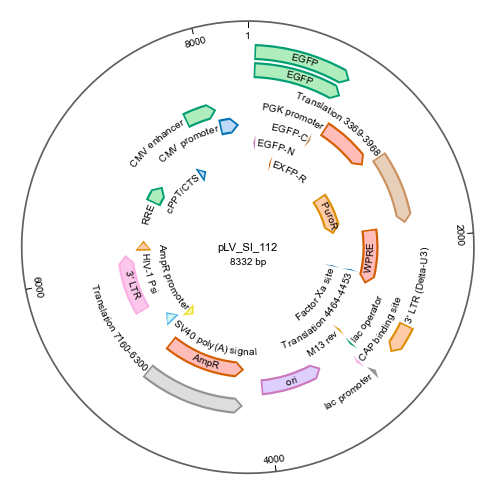

In [8]:
circular_map = visualizedna(pLV_SI_112, map_view="circular")

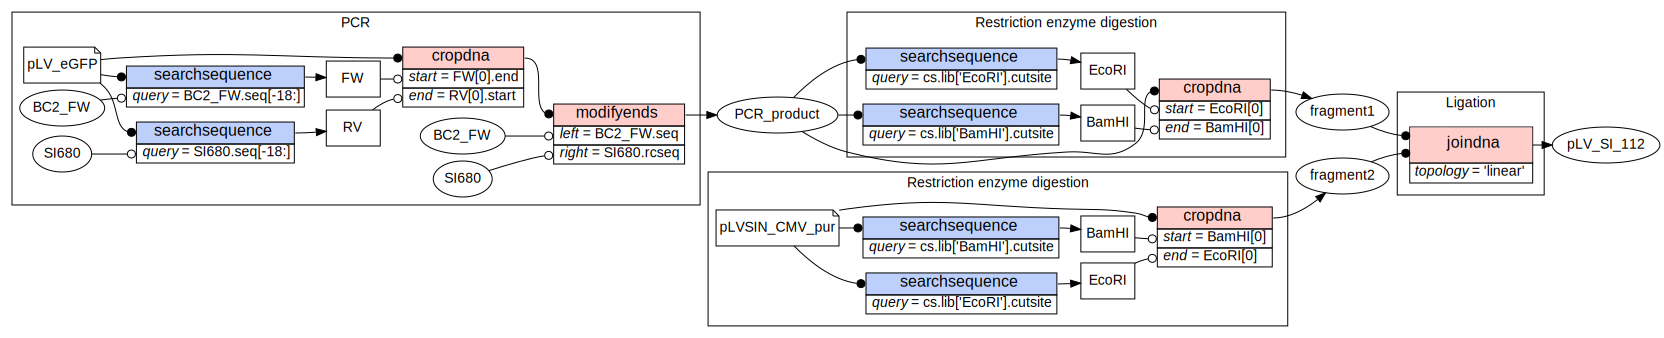

In [9]:
visualizeflow(pLV_SI_112)